In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/cardio_train.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


The Dataset contains several fields which leads to the __Presence or absence of cardiovascular disease__ within a patient.

1. __Age__ | Objective Feature | __age__ | int (days) |
2. __Height__ | Objective Feature | __height__ | int (cm) |
3. __Weight__ | Objective Feature | __weight__ | float (kg) |
4. __Gender__ | Objective Feature | __gender__ | categorical code |
5. __Systolic blood pressure__ | Examination Feature | __ap_hi__ | int |
6. __Diastolic blood pressure__ | Examination Feature | __ap_lo__ | int |
7. __Cholesterol__ | Examination Feature | __cholesterol__ | 1: normal, 2: above normal, 3: well above normal |
8. __Glucose__ | Examination Feature | __gluc__ | 1: normal, 2: above normal, 3: well above normal |
9. __Smoking__ | Subjective Feature | __smoke__ | binary |
10. __Alcohol intake__ | Subjective Feature | __alco__ | binary |
11. __Physical activity__ | Subjective Feature | __active__ | binary |
12. __Presence or absence of cardiovascular disease__ | Target Variable | __cardio__ | binary |

## Exploratory Data Analysis (EDA)

In [4]:
# checking for null values
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [5]:
# Checking the datatypes
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
#changing the datatype of weight column
df['weight'] = df['weight'].astype(int)

In [7]:
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69,130,80,2,2,0,0,1,0
1,989,14648,1,163,71,110,70,1,1,0,0,1,1
2,990,21901,1,165,70,120,80,1,1,0,0,1,0
3,991,14549,2,165,85,120,80,1,1,1,1,1,0
4,992,23393,1,155,62,120,80,1,1,0,0,1,0
5,995,21143,1,164,61,100,70,1,1,0,0,1,0
6,996,18085,1,162,72,100,70,1,1,0,0,1,0
7,997,22547,1,161,93,140,90,2,1,0,0,1,1
8,999,21250,1,157,68,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65,140,90,3,1,0,0,1,1


In [8]:
# Converting days into years in 'age' parameter
df['age'] = df['age']/365
df['age'] = df['age'].astype(int)
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0
5,995,57,1,164,61,100,70,1,1,0,0,1,0
6,996,49,1,162,72,100,70,1,1,0,0,1,0
7,997,61,1,161,93,140,90,2,1,0,0,1,1
8,999,58,1,157,68,110,80,1,1,0,0,1,0
9,1000,61,1,158,65,140,90,3,1,0,0,1,1


In [9]:
df.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

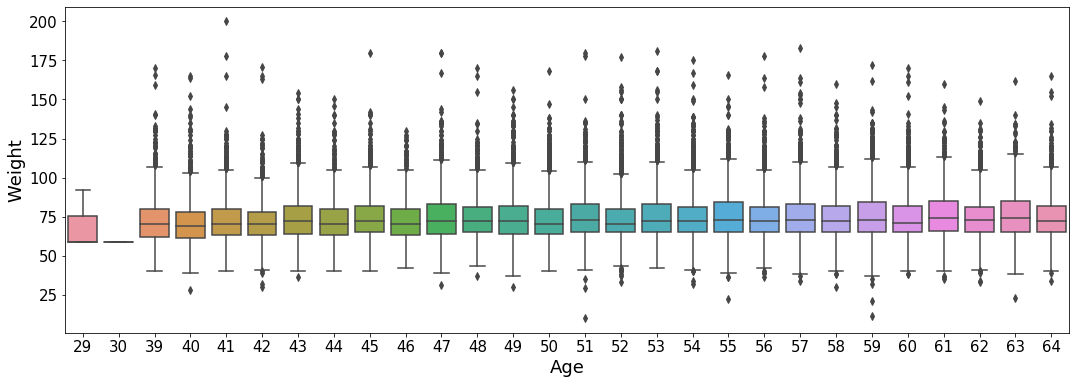

In [15]:
#box plot 
plt.figure(figsize=(18, 6))
sns.boxplot(x='age', y='weight', data=df)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Age", size=18)
plt.ylabel("Weight", size=18)
plt.show()